In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.metrics import mean_squared_error as mse
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
path = 'C:/Users/Mattias/Documents/ABBP_Project/JupyterNotebook/'
name = 'tabelklein.csv'
df = pd.read_csv(path + name, sep = ',')
df['bias'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 7 columns):
pixelx    2522 non-null int64
pixely    2522 non-null int64
pixelz    2522 non-null int64
robotx    2522 non-null float64
roboty    2522 non-null float64
robotz    2522 non-null float64
bias      2522 non-null int64
dtypes: float64(3), int64(4)
memory usage: 138.0 KB


In [3]:
df.head()

,pixelx,pixely,pixelz,robotx,roboty,robotz,bias
0,536,49,563,0.443804,0.160355,0.035042,1
1,536,71,559,0.463795,0.160342,0.035016,1
2,537,93,559,0.483791,0.160349,0.035028,1
3,537,115,558,0.503816,0.160330,0.035055,1
4,538,137,556,0.523800,0.160361,0.035006,1


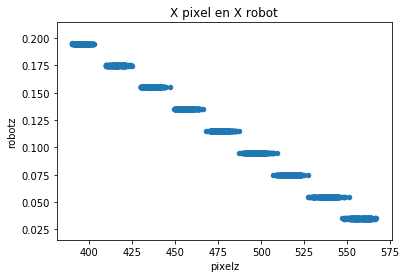

In [29]:
df.plot(kind='scatter',
        x='pixelz',
        y='robotz',
        title='X pixel en X robot')

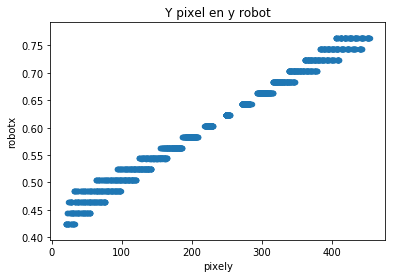

In [5]:
df.plot(kind='scatter',
        x='pixely',
        y='robotx',
        title='Y pixel en y robot')

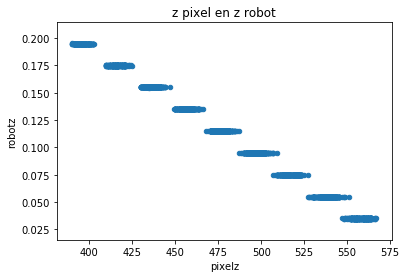

In [6]:
df.plot(kind='scatter',
        x='pixelz',
        y='robotz',
        title='z pixel en z robot')

In [7]:
df['groep'] = df['robotz'] * 100
df['groep'] = df['groep'].apply(np.ceil)
df
groepAr = np.array(df['groep'].unique())
groepAr

array([ 4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [8]:
dflaag4 = df[df['groep']==4]
dflaag8 = df[df['groep']==8]
dflaag12 = df[df['groep']==12]
dflaag16 = df[df['groep']==16]
dflaag20 = df[df['groep']==20]

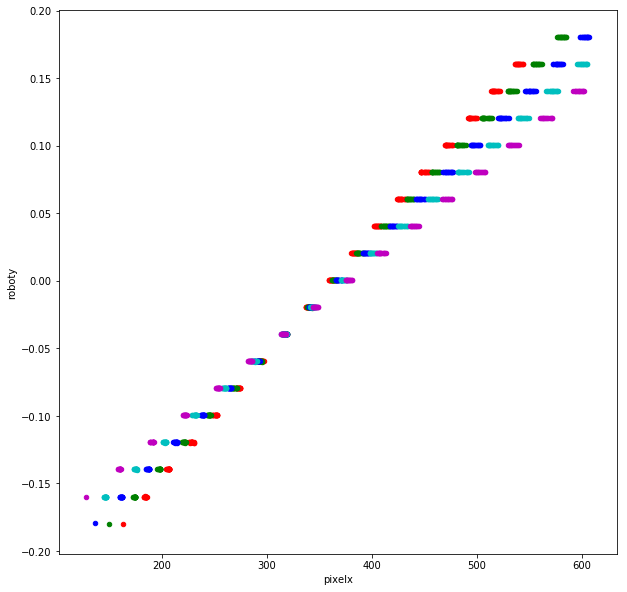

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
dflaag4.plot(ax=ax, kind='scatter',x='pixelx',y='roboty', color='r')
dflaag8.plot(ax=ax, kind='scatter',x='pixelx',y='roboty', color='g')
dflaag12.plot(ax=ax, kind='scatter',x='pixelx',y='roboty', color='b')
dflaag16.plot(ax=ax, kind='scatter',x='pixelx',y='roboty', color='c')
dflaag20.plot(ax=ax, kind='scatter',x='pixelx',y='roboty', color='m')

In [10]:
dflaag4['pixelz'].mean().round()

558.0

In [11]:
dflaag12['pixelz'].mean()

476.3904109589041

In [12]:
dflaag20['pixelz'].mean().round()

396.0

In [13]:
dflaag4

,pixelx,pixely,pixelz,robotx,roboty,robotz,bias,groep
0,536,49,563,0.443804,0.160355,0.035042,1,4.0
1,536,71,559,0.463795,0.160342,0.035016,1,4.0
2,537,93,559,0.483791,0.160349,0.035028,1,4.0
3,537,115,558,0.503816,0.160330,0.035055,1,4.0
4,538,137,556,0.523800,0.160361,0.035006,1,4.0
5,538,159,554,0.543800,0.160362,0.035035,1,4.0
6,539,181,554,0.563817,0.160362,0.035052,1,4.0
7,539,204,556,0.583794,0.160418,0.035049,1,4.0
8,539,226,553,0.603799,0.160345,0.035038,1,4.0
9,540,248,554,0.623781,0.160387,0.034996,1,4.0


In [14]:
inputAs = df[['bias','pixelx', 'pixelz']].values
outputAs = df[['roboty']].values

In [19]:
inputAs = df[['bias','pixelx']].values
outputAs = df[['roboty']].values

In [20]:
inputAs

array([[  1, 536],
       [  1, 536],
       [  1, 537],
       ...,
       [  1, 158],
       [  1, 158],
       [  1, 128]], dtype=int64)

In [21]:
outputAs

array([[ 0.160355],
       [ 0.160342],
       [ 0.160349],
       ...,
       [-0.13964 ],
       [-0.139653],
       [-0.159732]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(inputAs, outputAs, test_size=0.2)

In [23]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(2,)))
#model.add(Dense(4))
model.add(Dense(1))

model.compile(Adam(lr=0.1), 'mean_squared_error')

#es = EarlyStopping(monitor='val_loss', mode='min')

model.fit(X_train, y_train, batch_size = 100, epochs=500)

Epoch 1/500
2017/2017 [==============================] - 2s 860us/step - loss: 54988.0354
Epoch 2/500
2017/2017 [==============================] - 0s 6us/step - loss: 705.0114
Epoch 3/500
2017/2017 [==============================] - 0s 7us/step - loss: 143.2062
Epoch 4/500
2017/2017 [==============================] - 0s 6us/step - loss: 14.0639
Epoch 5/500
2017/2017 [==============================] - 0s 6us/step - loss: 1.3724
Epoch 6/500
2017/2017 [==============================] - 0s 6us/step - loss: 0.2201
Epoch 7/500
2017/2017 [==============================] - 0s 6us/step - loss: 0.0996
Epoch 8/500
2017/2017 [==============================] - 0s 6us/step - loss: 0.0834
Epoch 9/500
2017/2017 [==============================] - 0s 6us/step - loss: 0.0818
Epoch 10/500
2017/2017 [==============================] - 0s 5us/step - loss: 0.0812
Epoch 11/500
2017/2017 [==============================] - 0s 6us/step - loss: 0.0799
Epoch 12/500
2017/2017 [==============================] - 0s 6u

2017/2017 [==============================] - 0s 5us/step - loss: 2.7448e-04
Epoch 191/500
2017/2017 [==============================] - 0s 6us/step - loss: 1.5872e-04
Epoch 192/500
2017/2017 [==============================] - 0s 7us/step - loss: 1.6344e-04
Epoch 193/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.7275e-04
Epoch 194/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.8226e-04
Epoch 195/500
2017/2017 [==============================] - 0s 5us/step - loss: 2.1569e-04
Epoch 196/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.6269e-04
Epoch 197/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.4143e-04
Epoch 198/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.9847e-04
Epoch 199/500
2017/2017 [==============================] - 0s 6us/step - loss: 2.0705e-04
Epoch 200/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.5403e-04
Epoch 201/500
2017/2017 

2017/2017 [==============================] - 0s 6us/step - loss: 2.9096e-04
Epoch 375/500
2017/2017 [==============================] - 0s 6us/step - loss: 1.8567e-04
Epoch 376/500
2017/2017 [==============================] - 0s 5us/step - loss: 2.1923e-04
Epoch 377/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.5376e-04
Epoch 378/500
2017/2017 [==============================] - 0s 6us/step - loss: 1.6551e-04
Epoch 379/500
2017/2017 [==============================] - 0s 5us/step - loss: 2.0471e-04
Epoch 380/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.6968e-04
Epoch 381/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.9856e-04
Epoch 382/500
2017/2017 [==============================] - 0s 6us/step - loss: 2.7649e-04
Epoch 383/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.8964e-04
Epoch 384/500
2017/2017 [==============================] - 0s 5us/step - loss: 1.5833e-04
Epoch 385/500
2017/2017 

In [277]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_test_pred = model.predict(X_test)

In [26]:
print("The Mean Squared Error on the Test set is:\t{:0.3f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Test set is:	0.000


In [27]:
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Test set is:	0.984


In [28]:
r2_score(y_test, y_test_pred)

0.9836538108171085

In [281]:
X_train

array([[  1, 555],
       [  1, 398],
       [  1, 458],
       ...,
       [  1, 475],
       [  1, 500],
       [  1, 530]], dtype=int64)

In [282]:
y_train

array([[0.035046],
       [0.194949],
       [0.13502 ],
       ...,
       [0.11496 ],
       [0.094955],
       [0.0549  ]])

In [283]:
x = np.array([[1, 475]])
x

array([[  1, 475]])

In [284]:
model.predict(x)

array([[0.11330417]], dtype=float32)

In [217]:
model.get_weights()

[array([[ 1.2321368 , -0.7349999 ],
        [-0.06293797,  0.04479545]], dtype=float32),
 array([ 0.85242814, -0.12786667], dtype=float32),
 array([[0.08328288],
        [0.09501084]], dtype=float32),
 array([0.4912137], dtype=float32)]

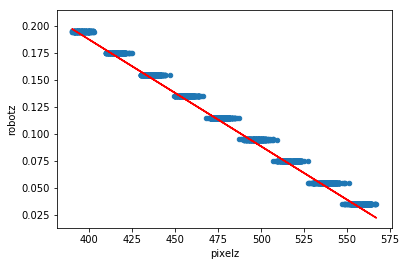

In [285]:
y_pred = model.predict(inputAs)
df.plot(kind='scatter',
        x='pixelz',
        y='robotz')
plt.plot(inputAs[:,1], y_pred, color='red')

In [289]:
x = np.array([[1, 0]])
b = model.predict(x)
a = (model.predict(np.array([[1, 400]])) - model.predict(np.array([[1,100]])))/(400-100)
a

array([[-0.00098842]], dtype=float32)

In [290]:
b

array([[0.58280337]], dtype=float32)

In [291]:
model.predict(np.array([[1, 460]]))

array([[0.12813044]], dtype=float32)

In [ ]:
#pixelz
za = -0.00098842
zb = 0.58280337

In [150]:
#laag 4 pixely
ya4 = 0.00090453
yb4 = 0.3967946

In [151]:
#laag 20 pixely
ya20 = 0.00064158
yb20 = 0.46212077

In [152]:
ya12 = (ya4 - ya20)/2 + ya20
yb12 = (yb4 - yb20)/2 + yb20

In [154]:
ya12

0.0007730549999999999

In [155]:
yb12

0.42945768500000003

In [368]:
#pixelx
h = 478
aya = (ya4 - ya20)/(558-396)
ayb = ya4 -(aya * 558)
ay = aya * h + ayb
ay

0.0007746781481481482

In [369]:
aya

1.6231481481481479e-06

In [370]:
ayb

-1.1866666666665582e-06

In [353]:
#pixelx
h = 478
bya = (yb4 - yb20)/(558-396)
byb = yb4 -(bya * 558)
by = bya * h + byb
by

0.42905443703703705

In [371]:
bya

-0.0004032479629629631

In [372]:
byb

0.6218069633333334

In [354]:
ypixel = 94
xrobot = ay * ypixel + by
xrobot

0.5018741829629629

In [355]:
#laag 4 pixelx
xa4 = 0.00089995
xb4 = -0.32532594

In [356]:
#laag 20 pixelx
xa20 = 0.00064482
xb20 = -0.24166721

In [357]:
xa12 = (xa4 - xa20)/2 + xa20
xb12 = (xb4 - xb20)/2 + xb20

In [358]:
xa12

0.000772385

In [359]:
xb12

-0.283496575

In [360]:
#pixelx
h = 558
axa = (xa4 - xa20)/(558-396)
axb = xa4 - (axa * 558)
ax = axa * h + axb
ax

0.00089995

In [361]:
axa

1.574876543209876e-06

In [362]:
axb

2.1168888888889155e-05

In [363]:
#pixelx
h = 558
bxa = (xb4 - xb20)/(558-396)
bxb = xb4 - (bxa * 558)
bx = bxa * h + bxb
bx

-0.32532594

In [364]:
bxa

-0.0005164119135802469

In [365]:
bxb

-0.037168092222222227

In [366]:
xpixel = 513
yrobot = ax * xpixel + bx
yrobot

0.13634840999999998

In [387]:
def pixel(pixelx, pixely, pixelz):
    
    #pixelz function variabels
    az = -0.00098842
    bz = 0.58280337
    
    robotz = az * pixelz + bz 
    
    #pixelx function variables
    axa = 1.574876543209876e-06
    axb = 2.1168888888889155e-05
    
    bxa = -0.0005164119135802469
    bxb = -0.037168092222222227
    
    #pixelx functions
    ax = axa * pixelz + axb
    bx = bxa * pixelz + bxb
    
    roboty = ax * pixelx + bx
    
    #pixely function variables
    aya = 1.6231481481481479e-06
    ayb = -1.1866666666665582e-06
    
    bya = -0.0004032479629629631
    byb = 0.6218069633333334
    
    #pixely functions
    ay = aya * pixelz + ayb
    by = bya * pixelz + byb
    
    robotx = ay * pixely + by
    
    return robotx, roboty, robotz

In [388]:
x,y,z = pixel(377,220,394)

In [389]:
x

0.6033606807407408

In [390]:
y

0.001275296913580276

In [391]:
z

0.19336589000000004

In [31]:
path = 'C:/Users/Mattias/Documents/ABBP_Project/JupyterNotebook/'
name = 'tabelklein.csv'
df = pd.read_csv(path + name, sep = ',')
df['bias'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 7 columns):
pixelx    2522 non-null int64
pixely    2522 non-null int64
pixelz    2522 non-null int64
robotx    2522 non-null float64
roboty    2522 non-null float64
robotz    2522 non-null float64
bias      2522 non-null int64
dtypes: float64(3), int64(4)
memory usage: 138.0 KB


In [32]:
df['groep'] = df['robotz'] * 100
df['groep'] = df['groep'].apply(np.ceil)
df
groepAr = np.array(df['groep'].unique())
groepAr

array([ 4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [79]:
dflaag4 = df[df['groep']==4]
dflaag8 = df[df['groep']==8]
dflaag12 = df[df['groep']==12]
dflaag16 = df[df['groep']==16]
dflaag20 = df[df['groep']==20]

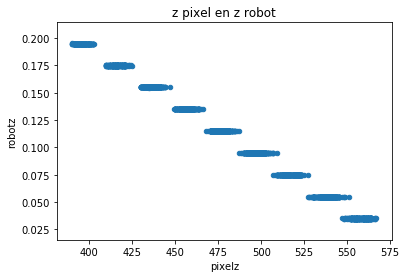

In [80]:
df.plot(kind='scatter',
        x='pixelz',
        y='robotz',
        title='z pixel en z robot')

In [85]:
dflaag20.head()

,pixelx,pixely,pixelz,robotx,roboty,robotz,bias,groep
2311,602,438,390,0.743805,0.140265,0.194885,1,20.0
2312,601,406,390,0.723789,0.140300,0.194936,1,20.0
2313,601,375,391,0.703806,0.140233,0.194901,1,20.0
2314,600,343,391,0.683804,0.140225,0.194873,1,20.0
2315,599,312,392,0.663804,0.140311,0.194902,1,20.0


In [105]:
df_sort4 = dflaag20.loc[(dflaag20['pixelx']-320).abs() & (dflaag20['pixely']-240).abs()]

KeyError: 'None of [2311      2\n2312      0\n2313      1\n2314      0\n2315      0\n2316      0\n2317      1\n2318     21\n2319     20\n2320     17\n2321     16\n2322     17\n2323     17\n2324      0\n2325    208\n2326    177\n2327    146\n2328    112\n2329     81\n2330     52\n2331     20\n2332      0\n2333     33\n2334     72\n2335    104\n2336    130\n2337    163\n2338    195\n2339    196\n2340    131\n       ... \n2492     64\n2493    131\n2494    128\n2495    129\n2496      2\n2497      2\n2498      1\n2499      0\n2500      1\n2501      0\n2502      0\n2503      1\n2504    129\n2505    128\n2506    128\n2507    128\n2508    138\n2509    128\n2510     32\n2511      0\n2512     32\n2513      0\n2514      0\n2515     32\n2516      0\n2517     32\n2518    129\n2519    160\n2520    130\n2521      0\nLength: 211, dtype: int64] are in the [index]'

In [89]:
df_sort3

,pixelx,pixely,pixelz,robotx,roboty,robotz,bias,groep
